# Data Homework: Chapter 11

Name:<u> Zach Johnson

Directions: Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=qN68) using pandas_datareader. 

>**Federal Reserve Balance Sheet and Components**
>
>*Assets*
>
>Total Assets: WALCL
>
>Repurchase Agreements: WORAL
>
>U.S. Treasury’s Held Outright by Federal Reserve: TREAST
>
>Mortgage-backed Securities Held by the Federal Reserves: WSHOMCB
>
>*Liabilities*
>
>Total Liabilities: WLTLECL
>
>Monetary Base: BOGMBASEW
>
>Monetary Base not Sterilized by the Federal Reserve: WLFN 
>
>Excess Reserves: EXCSRESNW
>
>Treasury’s General Account: WDTGAL
>
>Reverse Repurchase Agreements: WLRRAL

Preface:

>The Federal Reserve adds to the quantity of money when it purchases assets. The value of “Total Assets” reflects the total value of money creation by the Federal Reserve. The Federal Reserve removes money from the economy when it takes deposits or takes short-term loans. These are registered, along with the monetary base in circulation, as liabilities. 

1.	Create a variable called Excess Reserves and Treasury General Account. Create a third variable that is the sum of these two. Then plot all three variables together along with Total Liabilities.

In [1]:
#plots.py
# if you have not installed pandas-datareader, uncomment the command 
# in the next line. After intallation, you can remove the command
#!pip install pandas-datareader
# pandas_datareader is imported in datlib.FRED
import datetime
from datlib.FRED import *
# for each variable, enter the variable name followed by the variable code. 
# the first variable is completed for you
data_codes  = {"Total Assets": "WALCL",
               "Repurchase Agreements": "WORAL",
               "U.S. Treasuries Held Outright by Federal Reserve": "TREAST",
               "Mortgage-backed Securities Held by the Federal Reserves": "WSHOMCB",
               "Total Liabilities": "WLTLECL",
               "Monetary Base": "BOGMBASEW",
               "Monetary Base not Sterilized by the Federal Reserve": "WLFN",
               "Excess Reserves": "EXCSRESNW",
               "Treasury's General Account": "WDTGAL",
               "Reverse Repurchase Agreements": "WLRRAL"}
# Select start and end dates
# datetime.datetime(year, month, day)
start = datetime.datetime(2003, 1, 1)
end = datetime.datetime.today()

In [2]:
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "W")

In [3]:
from datlib.plots import *
plt.rcParams.update({"font.size":32})
data["ER + TGA"] = data["Excess Reserves"].add(data["Treasury's General Account"])

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


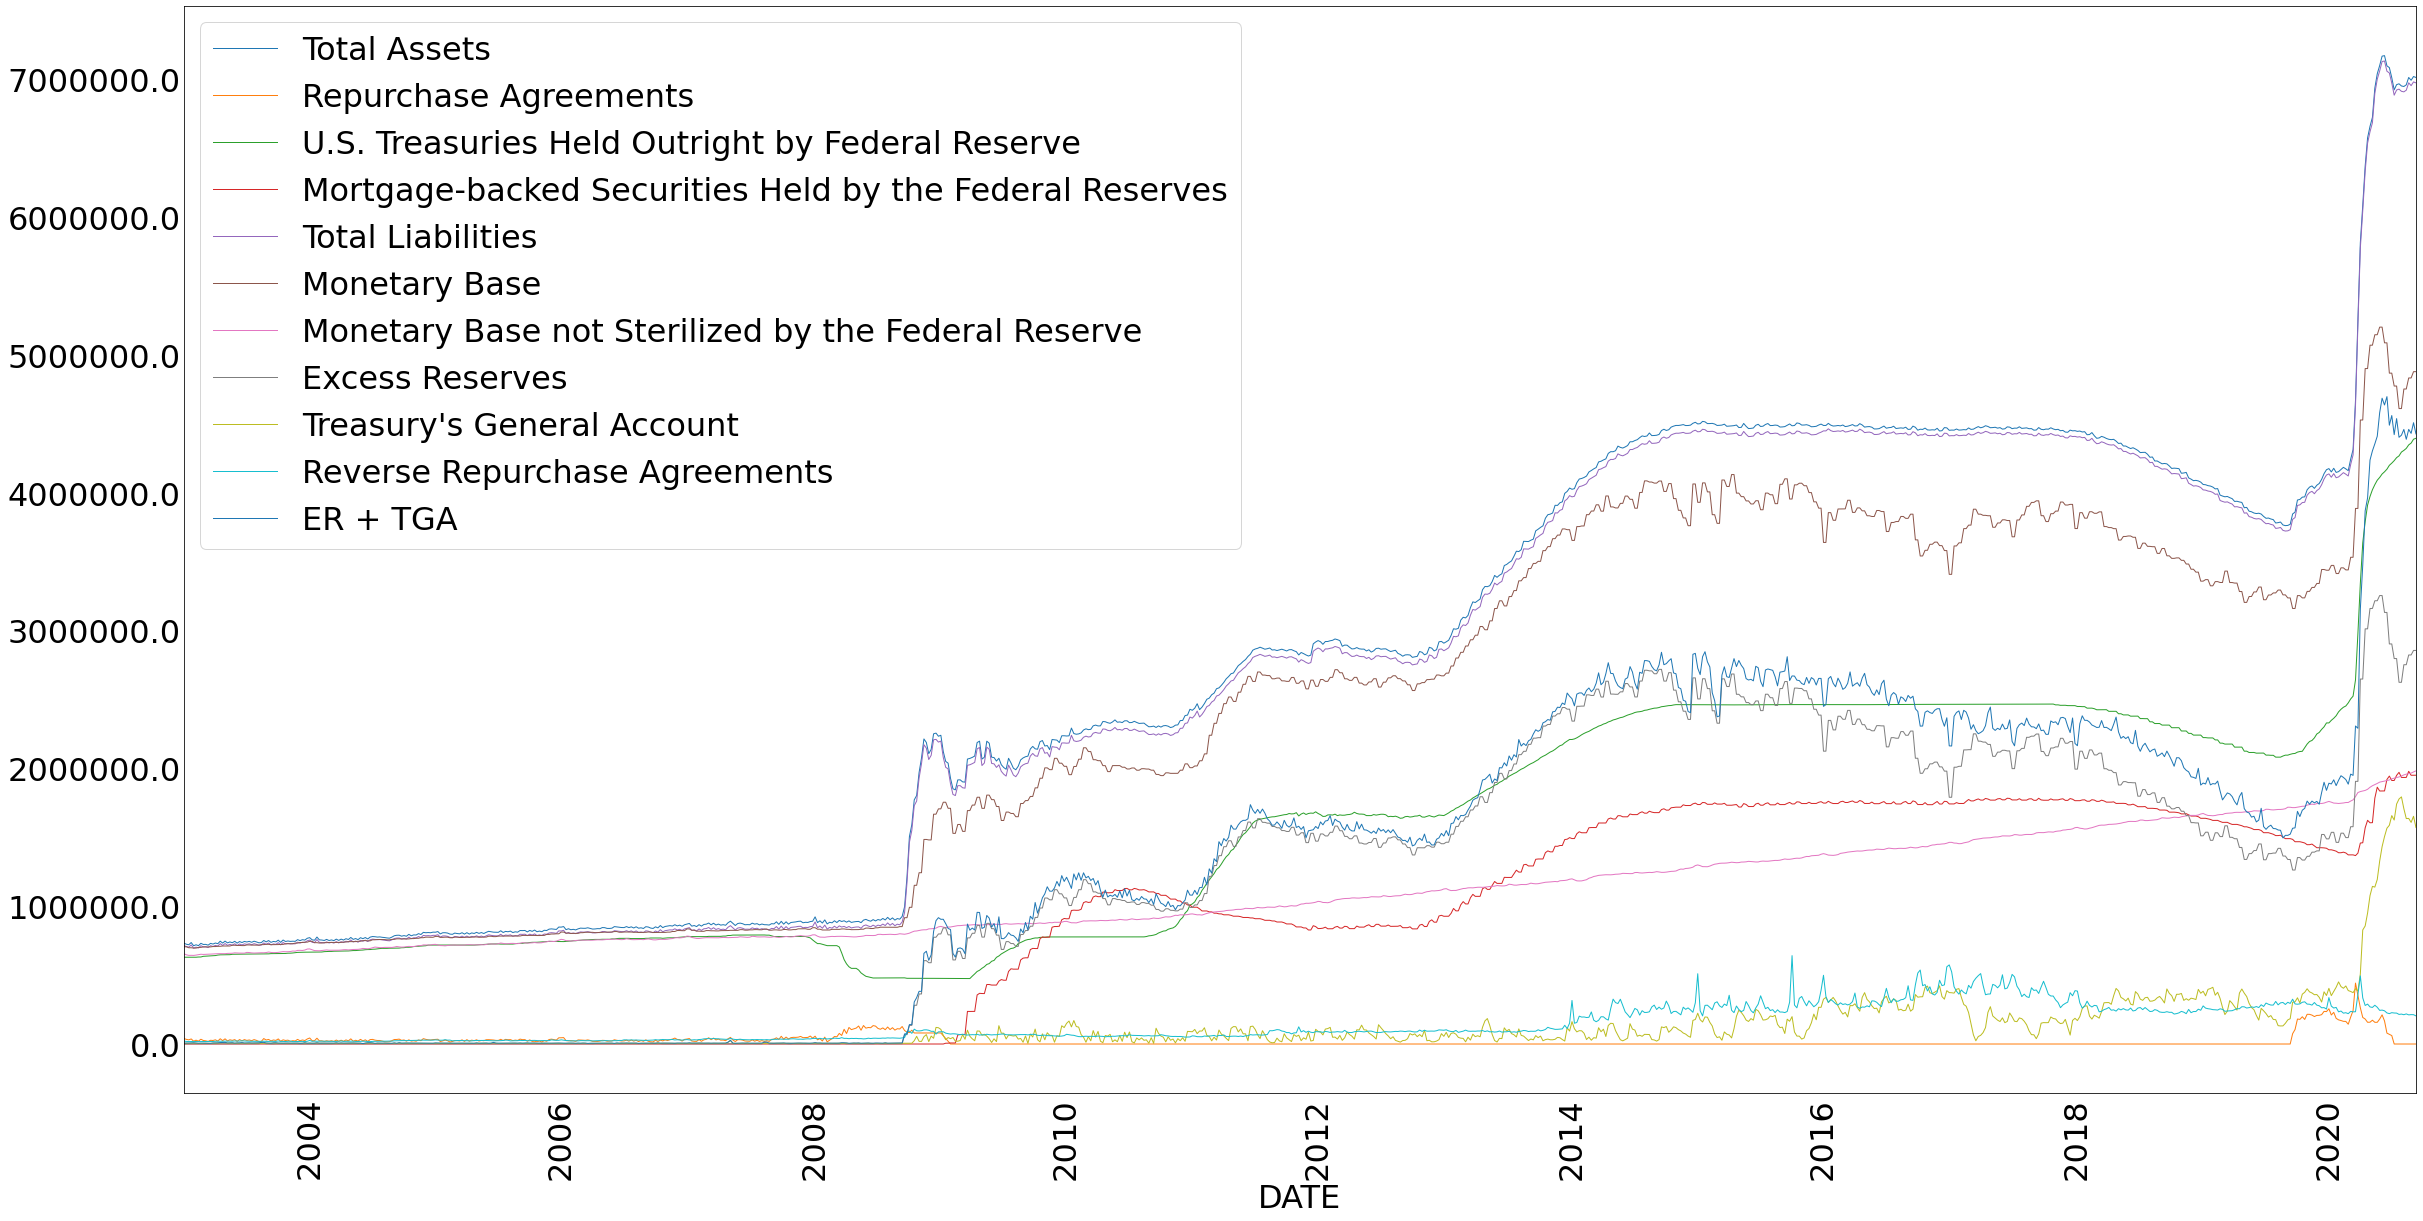

In [4]:
plot_lines(data)

2.	Create a variable that shows what percent of the value of the Federal Reserve's balance sheet that is composed of excess reserves (use the value of total assets even though excess reserves held on account of the Fed are a liability of the Fed).

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


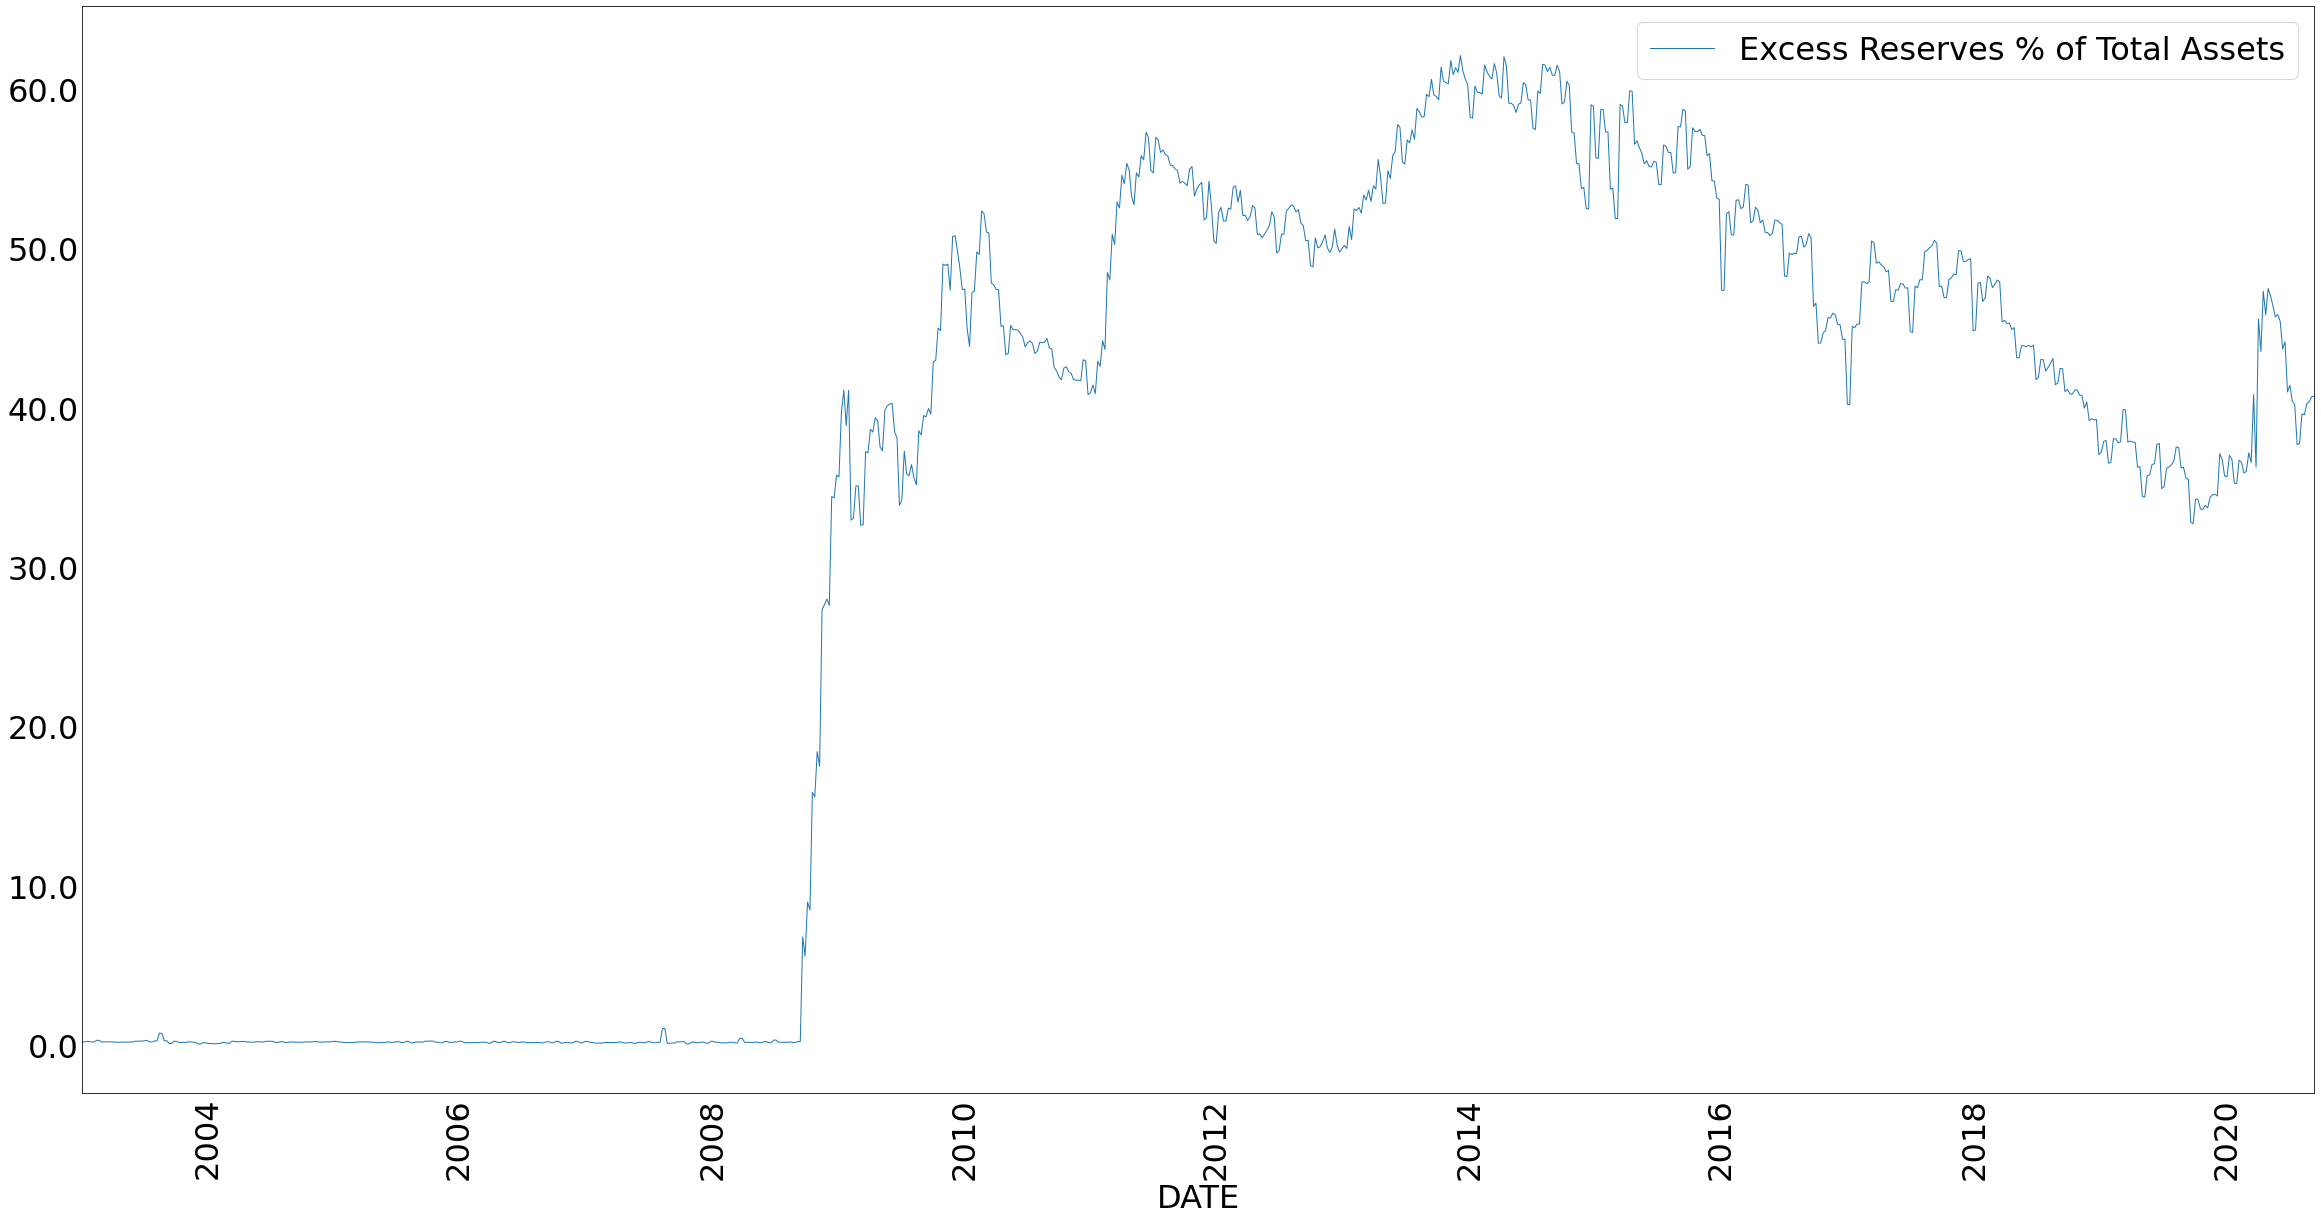

In [5]:
data["Excess Reserves % of Total Assets"] = data["Excess Reserves"] / data["Total Assets"] * 100
plot_lines(data["Excess Reserves % of Total Assets"])

3.	Create a variable that shows what percent of the balance sheet (use the value of total assets even though the base is a liability) is held on deposit in the Treasury’s General Account.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


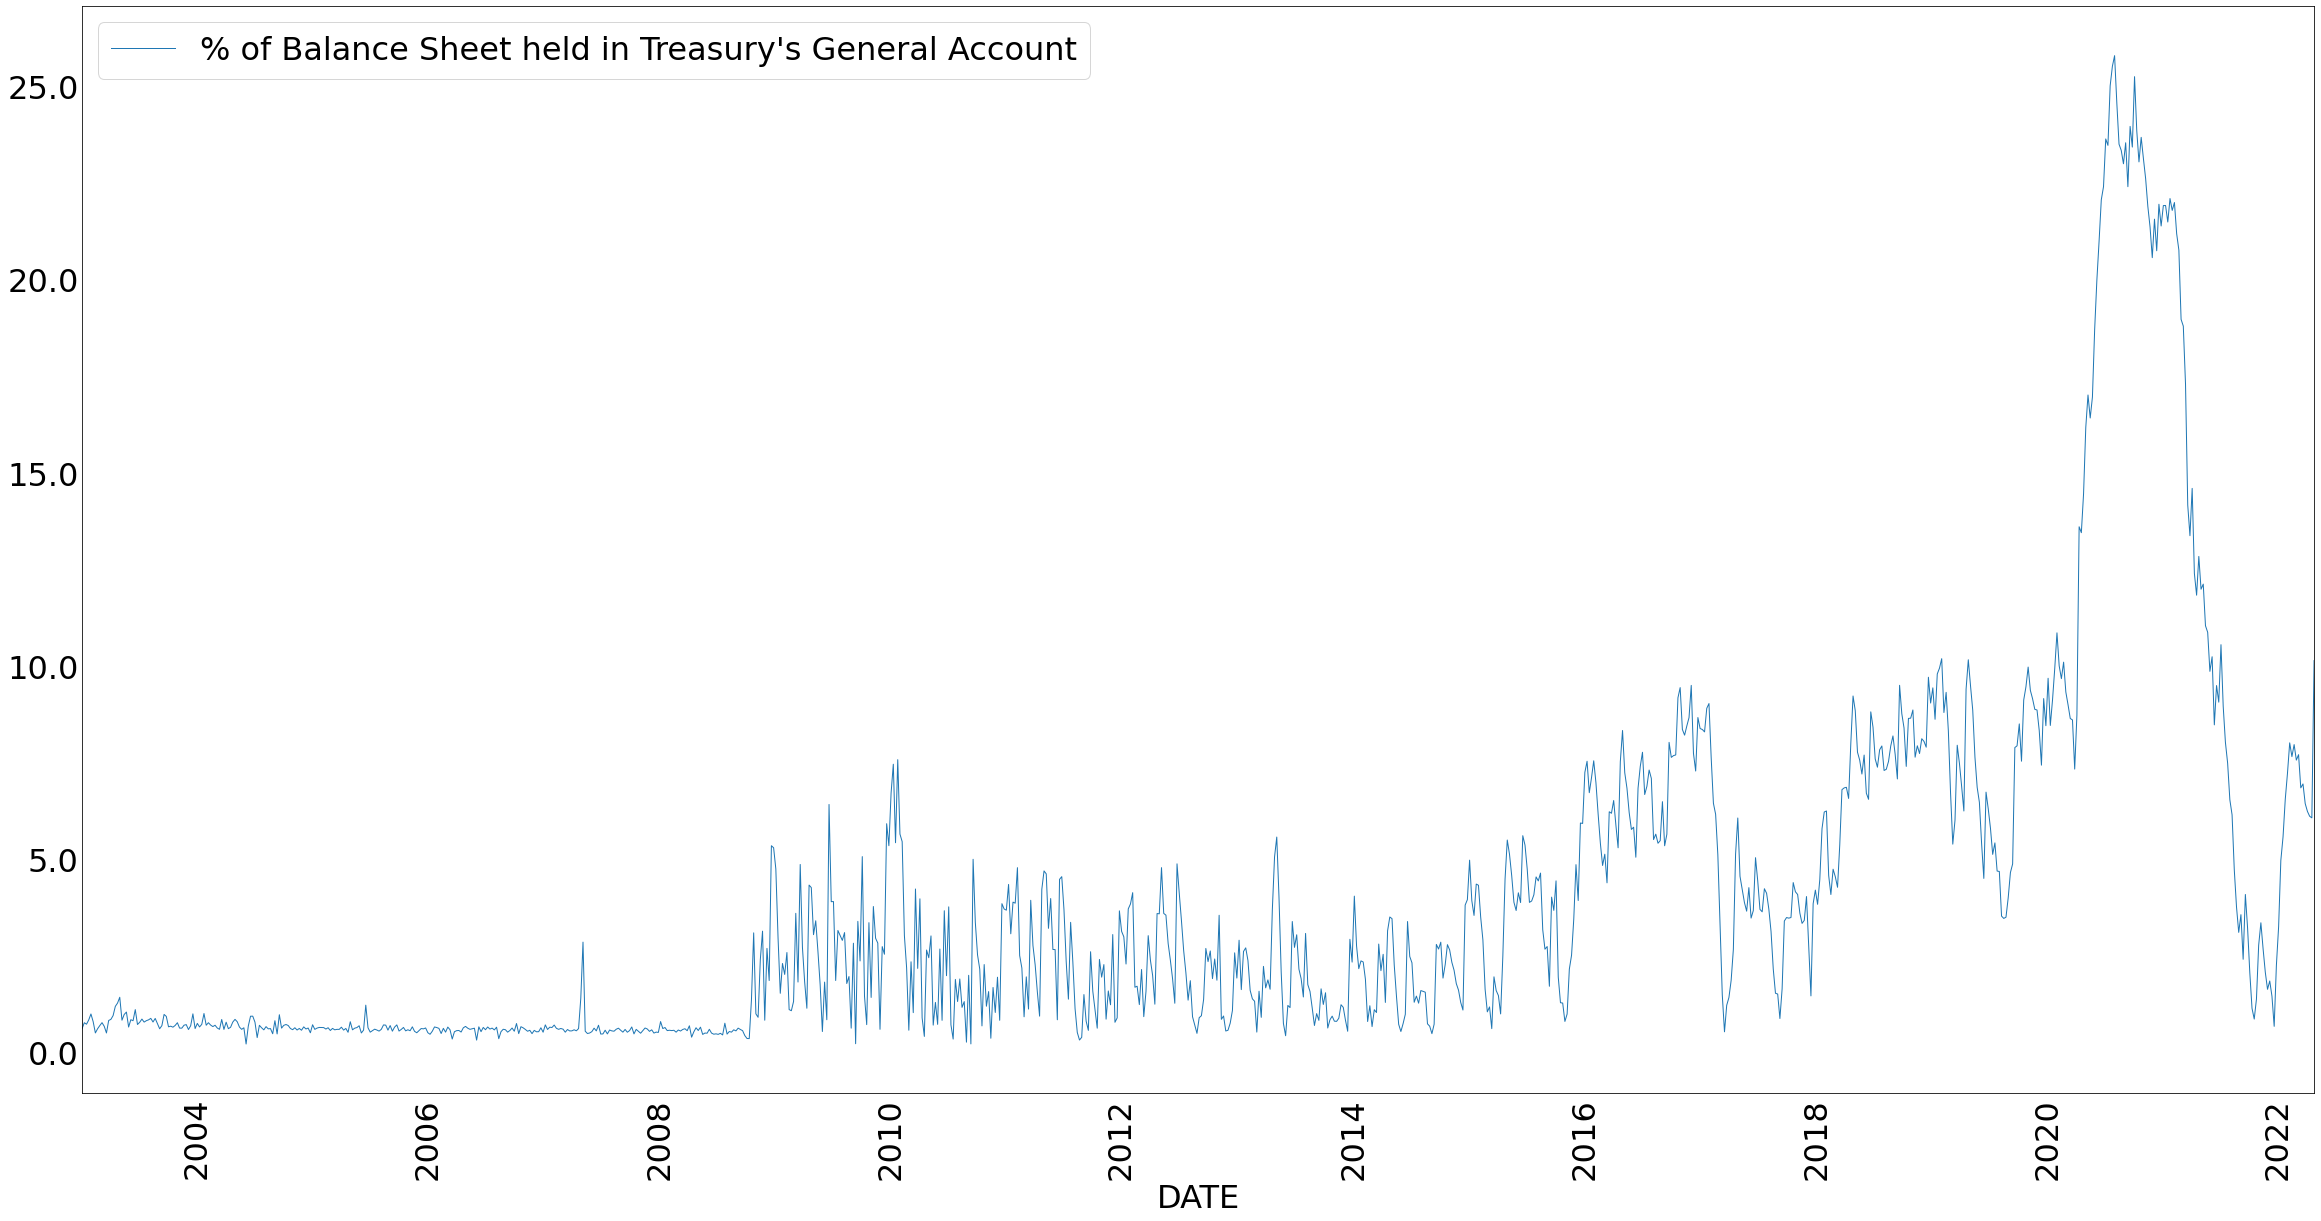

In [7]:
data["% of Balance Sheet held in Treasury's General Account"] = data["Treasury's General Account"] / data["Total Assets"] *100
plot_lines(data["% of Balance Sheet held in Treasury's General Account"])

4.	Create a variable that sums the percent values from 2) and 3) plot all three percentages in one graph.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


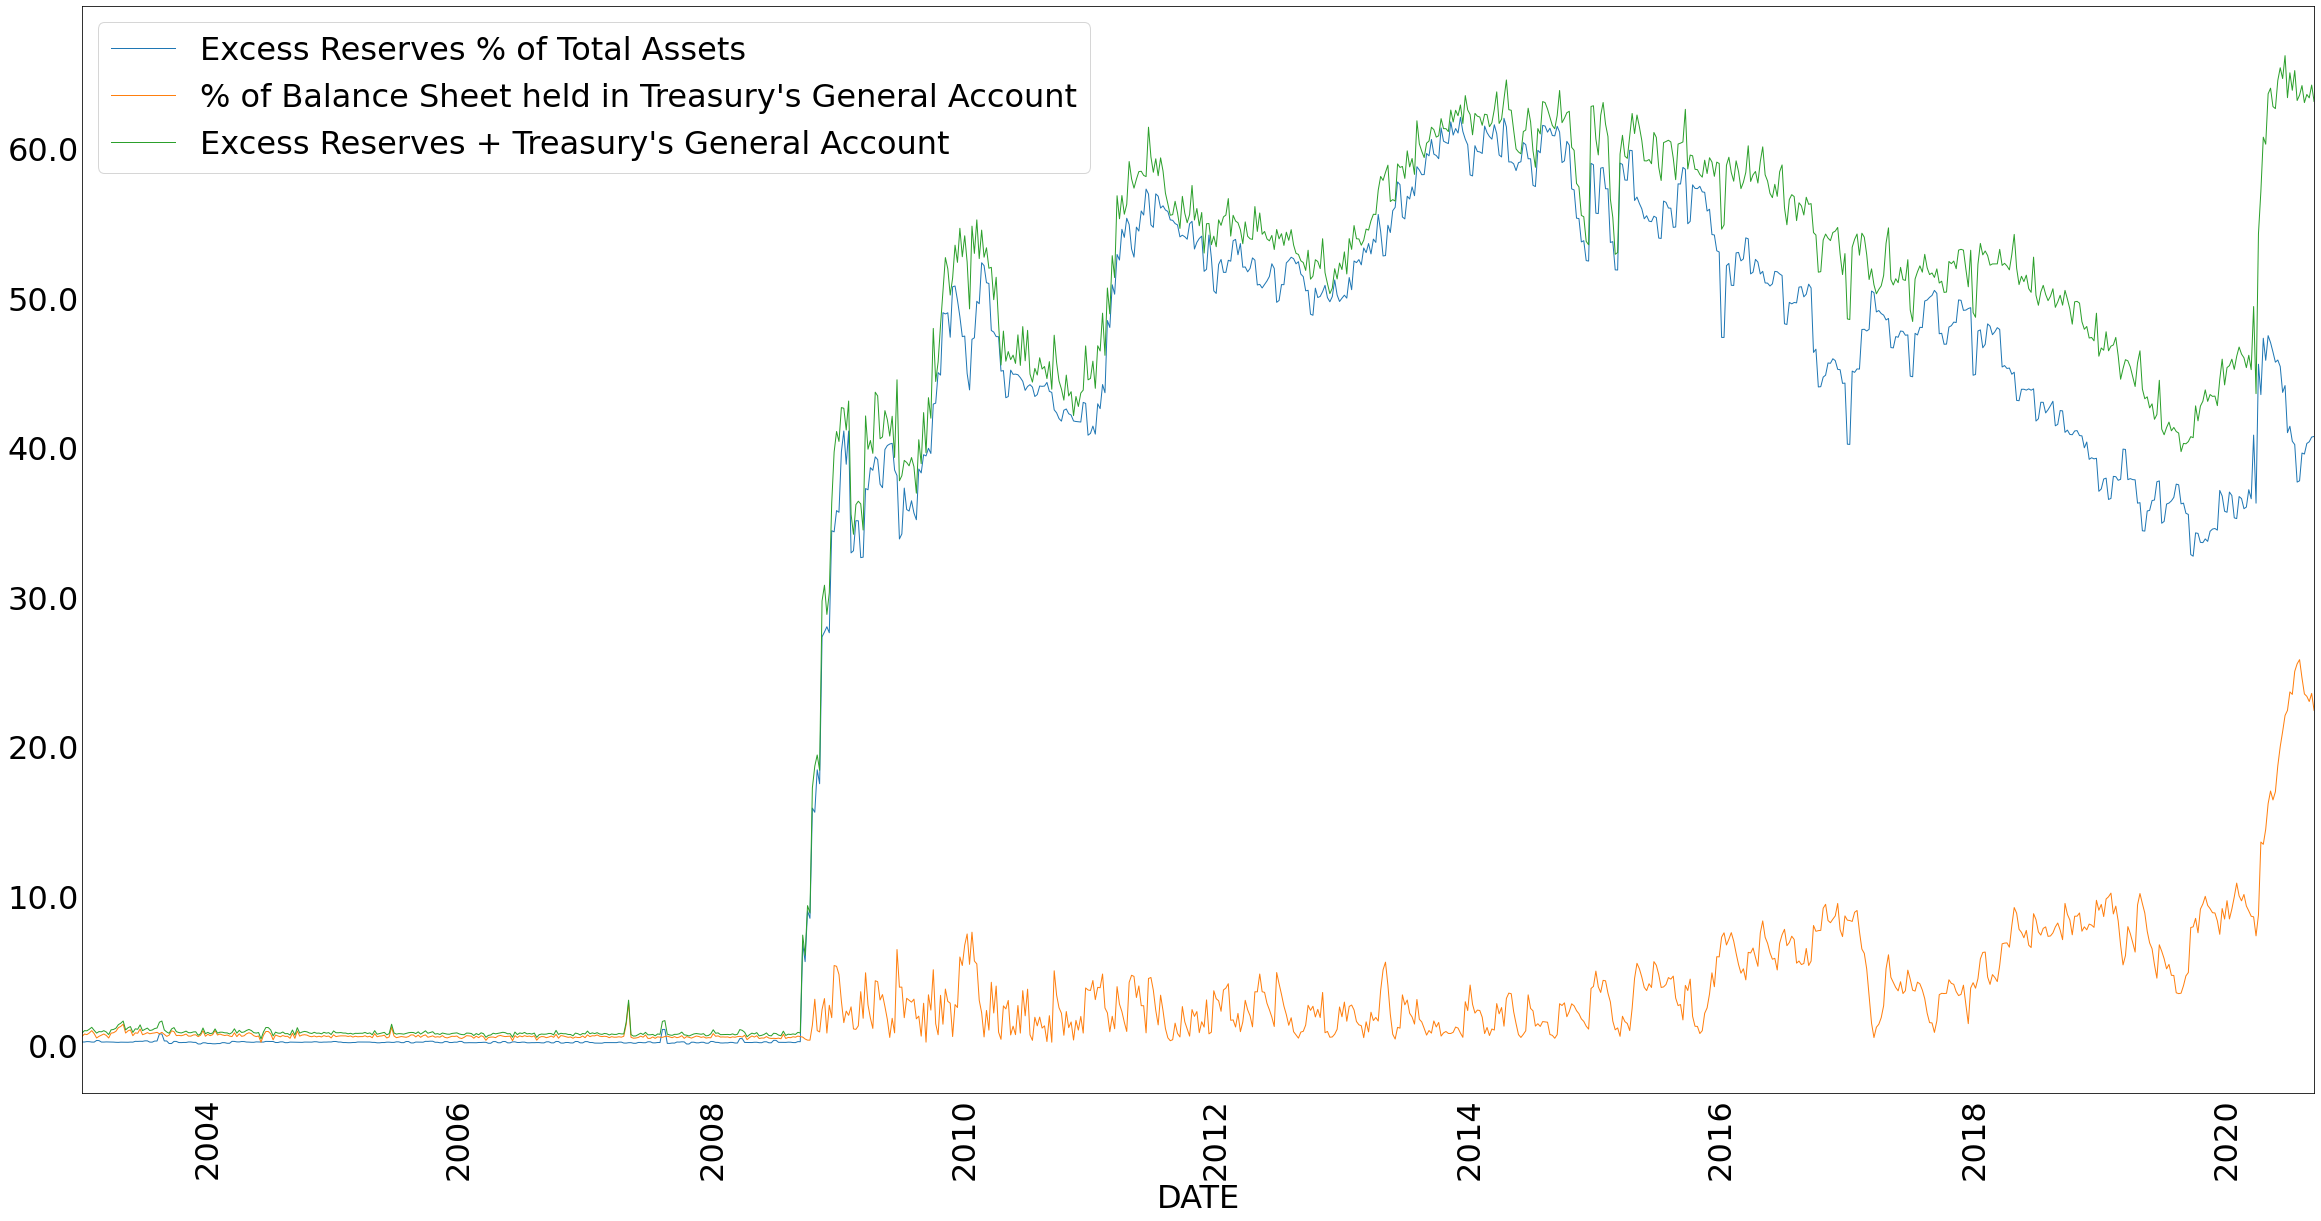

In [10]:
data["Excess Reserves + Treasury's General Account"] = data["Excess Reserves % of Total Assets"] + data["% of Balance Sheet held in Treasury's General Account"]
plot_vars = ["Excess Reserves % of Total Assets", "% of Balance Sheet held in Treasury's General Account", "Excess Reserves + Treasury's General Account"]

plot_lines(data[plot_vars])

5.	Repurchase agreements represent short-term loans provided by the Federal Reserve to the investors in the overnight lending market. Reverse repurchase agreements represent loans provided by investors in the overnight lending market to the Federal Reserve.

>a. Create a variable called “Net Repurchase Agreements”. To calcualte this, subtract reverse repurchase agreements from repurchase agreements. 

In [11]:
data["Net Repurchase Agreements"] = data["Repurchase Agreements"] - data["Reverse Repurchase Agreements"]

>b. What is the Federal Reserve’s net effect on the overnight lending market in terms of repurchase agreements (i.e., negative values represent removal of funds  from the market).Plot all three variables in one graph.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


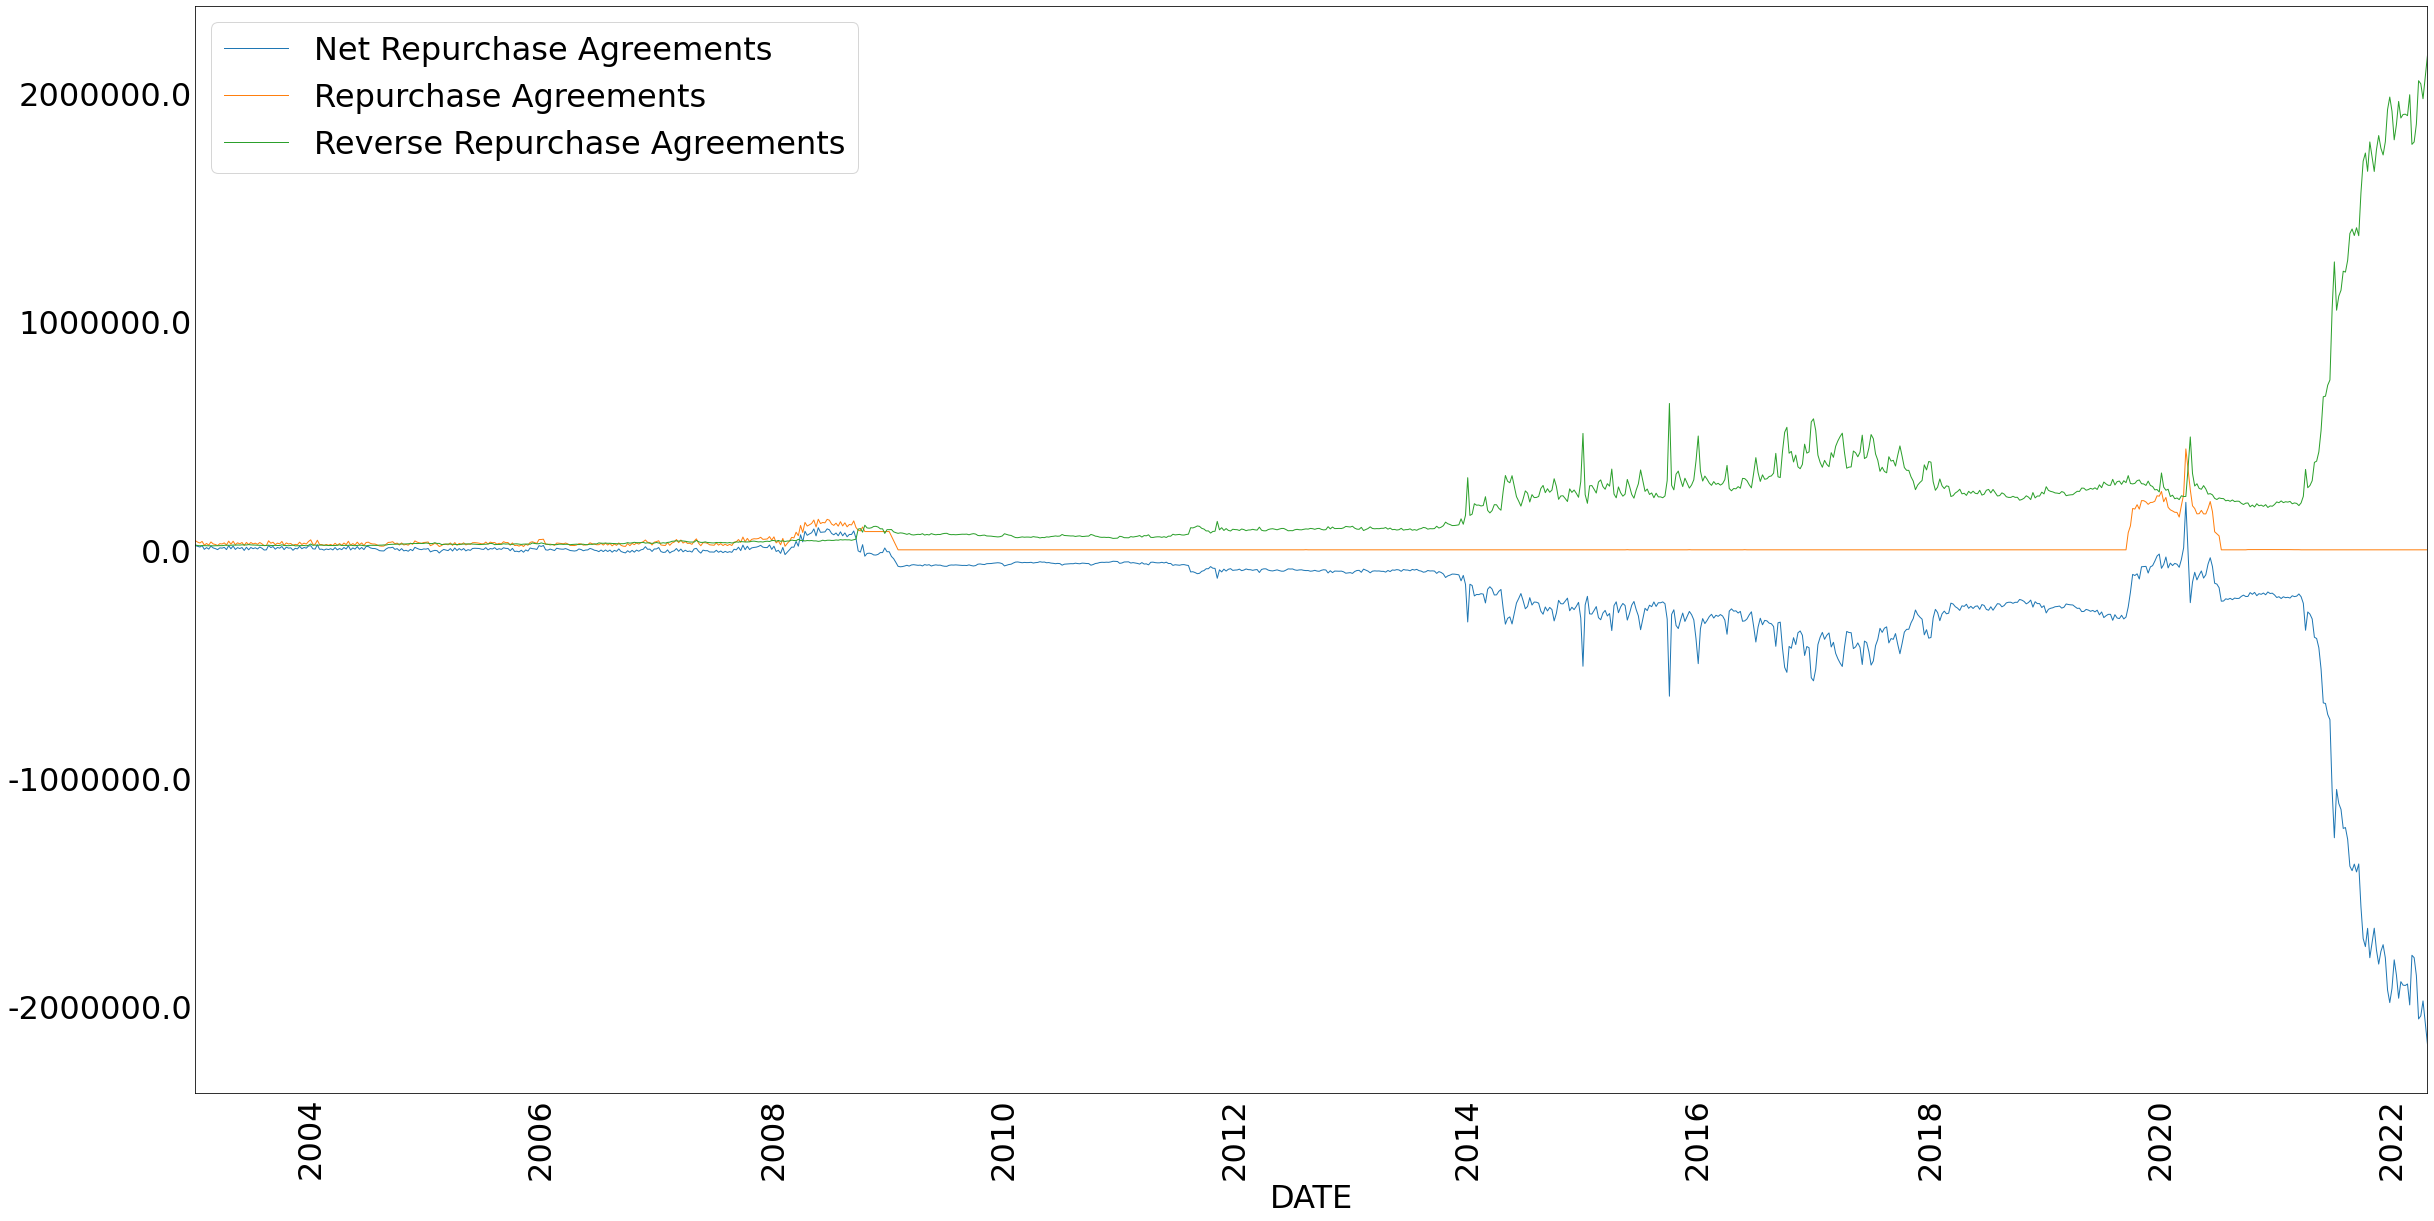

In [12]:
repurchase_vars = ["Net Repurchase Agreements", "Repurchase Agreements", "Reverse Repurchase Agreements"]
plot_lines(data[repurchase_vars])

The feds policy changes cuased an increase in repurchase agreements. For the previosu two decades, reverse purchasing agreements had vastly outnumbered the rare repurchase agreement. In 2020, there was a spike in repurchase agreements and reverse repurchase agreements. Since then, reverse repurchase agreements have increased to many times their previous levels. 

6.	Sum together U.S. Treasuries Held Outright by the Federal Reserve and Mortgage-backed Securities Held by the Federal Reserve. Call the variable “U.S. Treasuries and Mortgage-backed Securities held by Federal Reserve. Plot all three variables along with Total Assets.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


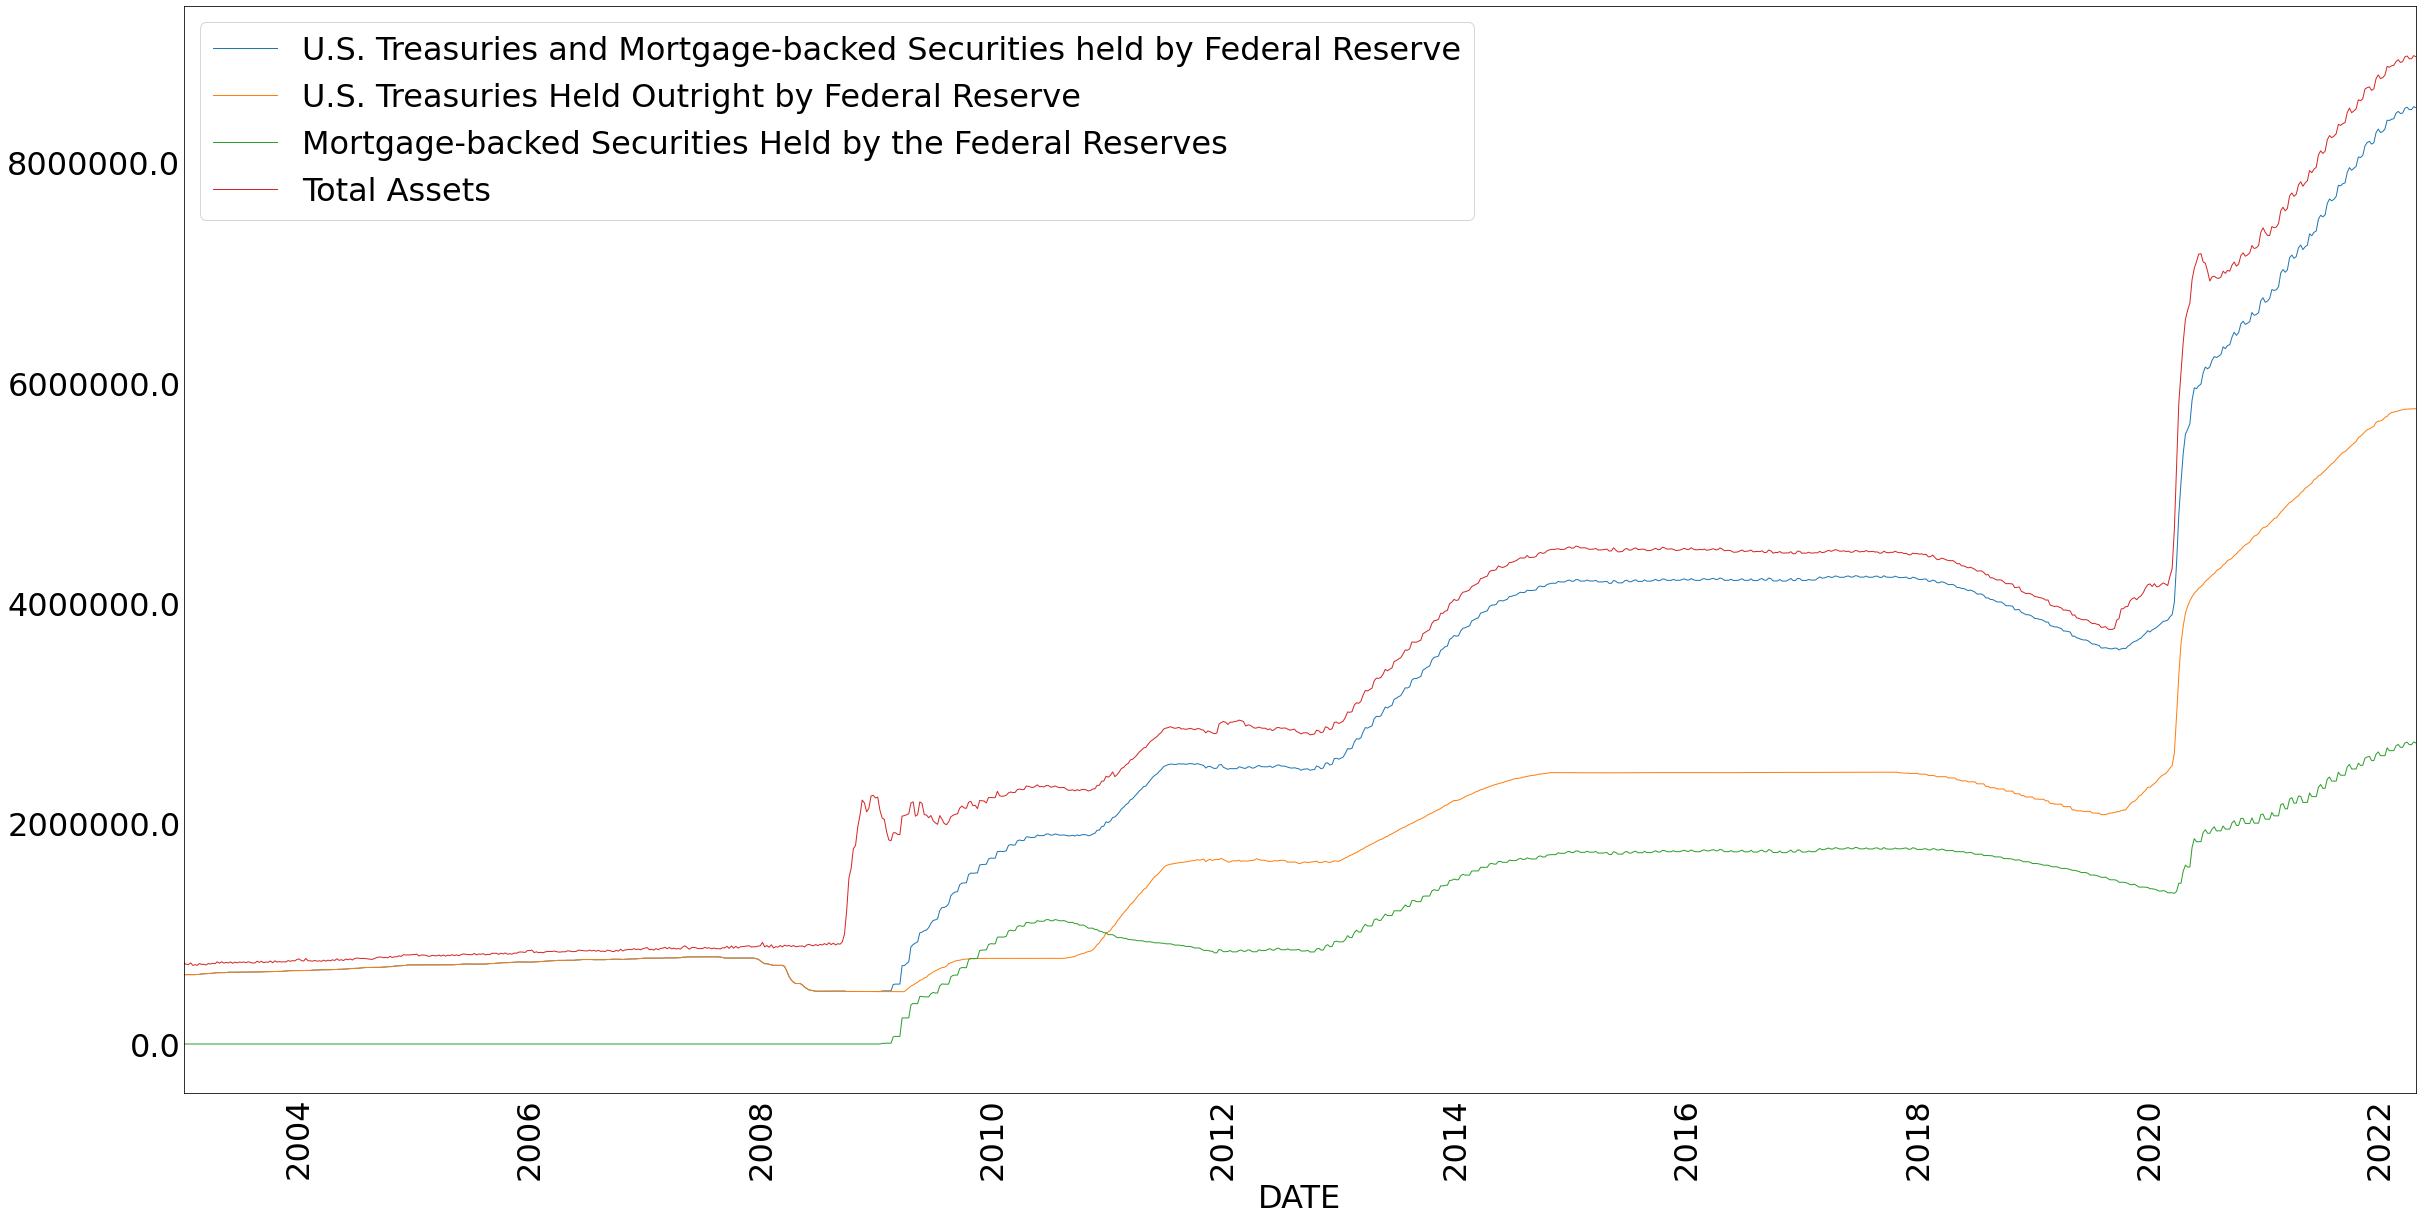

In [18]:
data["U.S. Treasuries and Mortgage-backed Securities held by Federal Reserve"] = data["U.S. Treasuries Held Outright by Federal Reserve"] + data["Mortgage-backed Securities Held by the Federal Reserves"]
securities_plotvars = ["U.S. Treasuries and Mortgage-backed Securities held by Federal Reserve", "U.S. Treasuries Held Outright by Federal Reserve", "Mortgage-backed Securities Held by the Federal Reserves", "Total Assets"]
plot_lines(data[securities_plotvars])

7.	In light of the lecture, explain why the Monetary Base has increased dramatically compared to the Monetary Base not Sterilized by the Federal Reserve. (compared to the quantity of currency in circulation)

There was a pardigm shift at the federal reserve after ben bernake left. Under bernake, the fed had provided large interest payments for holding money at the local fed branch. When Jerome Powell came in, he decreased these interest payments, causing more overnight lending to be done between banks, without the fed involved. This has risen the "unsterlized" portion of the monetary base, which is money created by banks lending out their reserves. 